In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

In [76]:
!pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)


In [88]:

file_path = r"D:\projects\Data-Resources\Data & Resources\data churn_analysis.xlsx"

 

# Define the sheet name to read data from
sheet_name = 'vw_churndata'

 

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [89]:
data.head(2)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12210-AND,Male,66,No,Andhra Pradesh,9,31,NaN,No,No,...,Credit Card,34.299999,577.150024,0.0,0,0.0,577.150024,Stayed,Others,Others
1,12531-AND,Male,56,No,Andhra Pradesh,1,12,NaN,No,No,...,Bank Withdrawal,62.500000,4136.399902,0.0,0,0.0,4136.399902,Stayed,Others,Others


drop columns that wont be used for prediction

In [90]:
df=data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

In [91]:
df.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [92]:
df.head(2)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Male,66,No,Andhra Pradesh,9,31,NaN,No,No,Yes,...,Month-to-Month,Yes,Credit Card,34.299999,577.150024,0.0,0,0.0,577.150024,Stayed
1,Male,56,No,Andhra Pradesh,1,12,NaN,No,No,Yes,...,Two Year,Yes,Bank Withdrawal,62.500000,4136.399902,0.0,0,0.0,4136.399902,Stayed


In [93]:
df.isnull().sum()

Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3239
Phone_Service                     0
Multiple_Lines                    0
Internet_Service                  0
Internet_Type                  1223
Online_Security                   0
Online_Backup                     0
Device_Protection_Plan            0
Premium_Support                   0
Streaming_TV                      0
Streaming_Movies                  0
Streaming_Music                   0
Unlimited_Data                    0
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges       0
Total_Revenue               

In [94]:
df['Value_Deal'].value_counts()

Value_Deal
Deal 2    740
Deal 5    578
Deal 4    531
Deal 1    456
Deal 3    359
Name: count, dtype: int64

In [95]:
columns_to_encode=['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method']

Encode categorical variables except the target variable


In [96]:
label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    df[column] = label_encoders[column].fit_transform(df[column])


In [97]:
df['Customer_Status'].value_counts()

Customer_Status
Stayed     4198
Churned    1705
Name: count, dtype: int64

In [98]:
df['Customer_Status'] = df['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [99]:
X=df.drop("Customer_Status",axis=1)
Y=df['Customer_Status']

In [100]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [101]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [102]:
#Evaluate Model

# Make predictions

y_pred = rf_model.predict(X_test)

In [103]:
# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[787  55]
 [131 208]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       842
           1       0.79      0.61      0.69       339

    accuracy                           0.84      1181
   macro avg       0.82      0.77      0.79      1181
weighted avg       0.84      0.84      0.84      1181



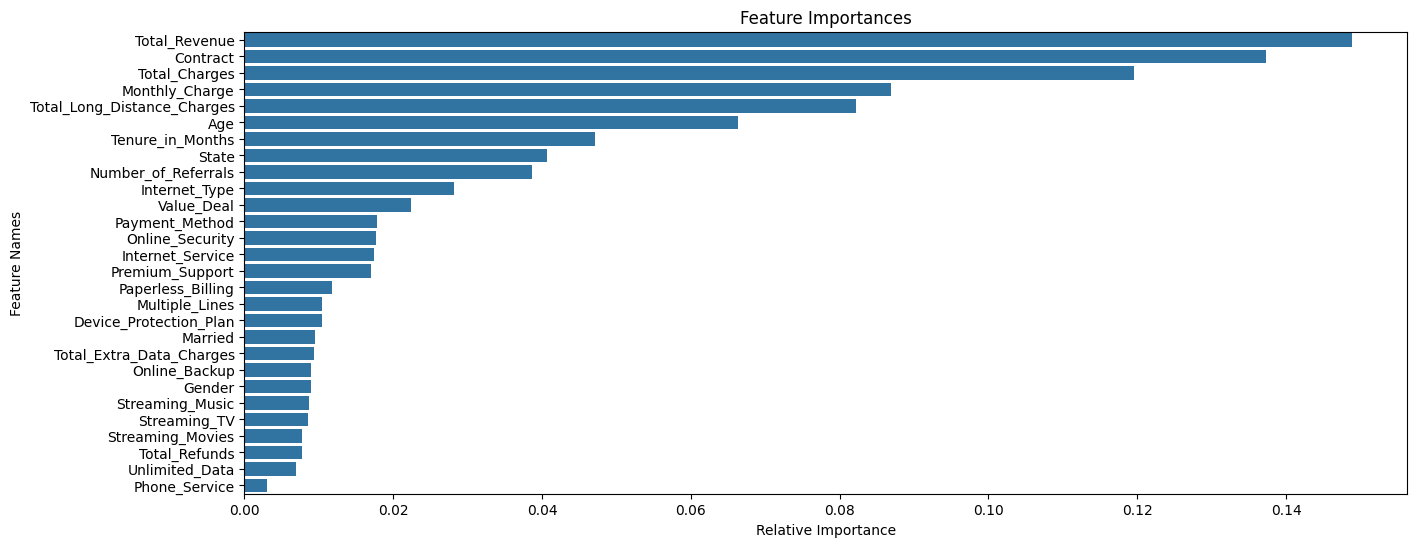

In [104]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [ ]:
# Define the path to the Joiner Data Excel file
file_path = r"D:\projects\Data-Resources\Data & Resources\data churn_analysis.xlsx"
# Define the sheet name to read data from
sheet_name = 'db_churn vw_joindata'
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)
# Display the first few rows of the fetched dat
print(new_data.head())
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()
# Retain the Customer_ID colum
customer_ids = new_data['Customer_ID']
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"D:\projects\Data-Resources\Data & Resources\data churn_analysis.csv", index=False)

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   12257-ASS  Female   39      No          Assam                  9.0   
1   13946-HAR  Female   41     Yes        Haryana                  1.0   
2   14567-TAM    Male   43      No     Tamil Nadu                  1.0   
3   15591-KAR  Female   26      No      Karnataka                  3.0   
4   15803-UTT  Female   34      No  Uttar Pradesh                  6.0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 1        NaN           Yes             No  ...   
1                 3     Deal 5           Yes             No  ...   
2                 9        NaN           Yes             No  ...   
3                31        NaN           Yes             No  ...   
4                31        NaN           Yes             No  ...   

  Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0    Credit Card      19.549999     19.549999           NaN   
1    Credit Card    